In [102]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv('Temperature Forecast.csv')
pd.set_option('display.max_columns', None)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [104]:
df.shape

(7752, 25)

In [105]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [106]:
for i in df.columns: 
    print('Total number of unique values in ', i, ' = ', df[i].nunique())

Total number of unique values in  station  =  25
Total number of unique values in  Date  =  310
Total number of unique values in  Present_Tmax  =  167
Total number of unique values in  Present_Tmin  =  155
Total number of unique values in  LDAPS_RHmin  =  7672
Total number of unique values in  LDAPS_RHmax  =  7664
Total number of unique values in  LDAPS_Tmax_lapse  =  7675
Total number of unique values in  LDAPS_Tmin_lapse  =  7675
Total number of unique values in  LDAPS_WS  =  7675
Total number of unique values in  LDAPS_LH  =  7675
Total number of unique values in  LDAPS_CC1  =  7569
Total number of unique values in  LDAPS_CC2  =  7582
Total number of unique values in  LDAPS_CC3  =  7599
Total number of unique values in  LDAPS_CC4  =  7524
Total number of unique values in  LDAPS_PPT1  =  2812
Total number of unique values in  LDAPS_PPT2  =  2510
Total number of unique values in  LDAPS_PPT3  =  2356
Total number of unique values in  LDAPS_PPT4  =  1918
Total number of unique values in

    Since most of the LAT and LON are similar, it looks like the data is collected repetedly from the same locations. 

In [107]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

    We can replace all values except Date with mean, and Date with mode. 

### Handling the date

In [108]:
df['Date'] = pd.to_datetime(df.Date)

In [109]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [110]:
df.drop('Date', inplace = True, axis = 1)

In [111]:
df['Year'].value_counts()

2015.0    1550
2014.0    1550
2013.0    1550
2016.0    1550
2017.0    1550
Name: Year, dtype: int64

In [112]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


### Imputing

<AxesSubplot:>

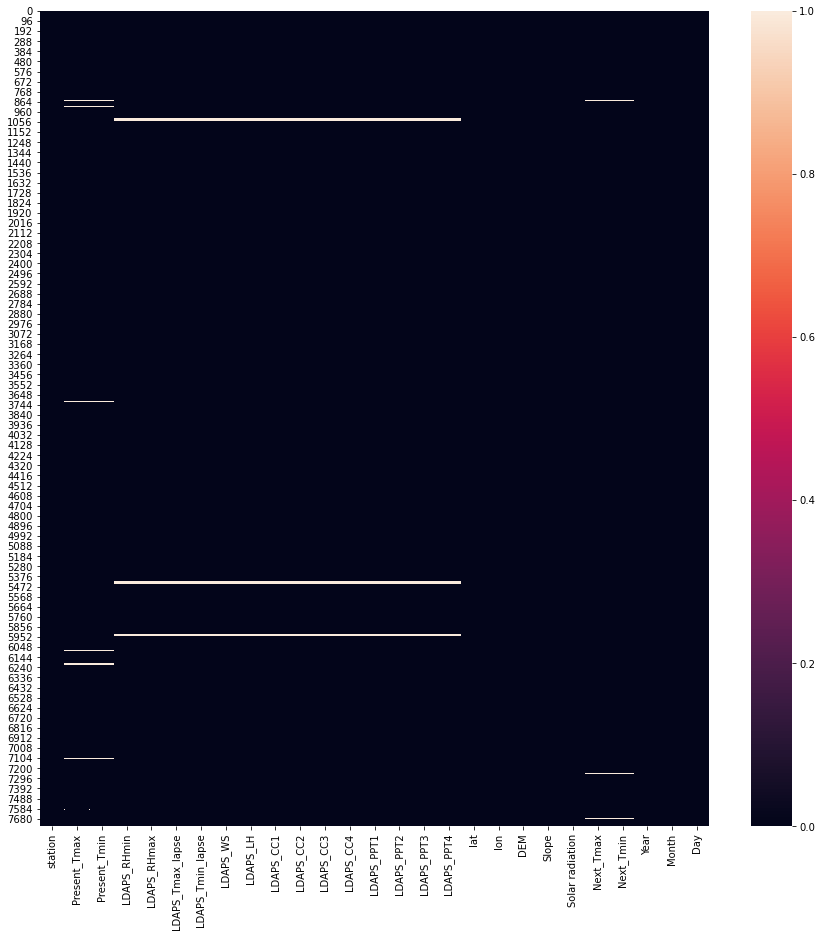

In [113]:
plt.figure(figsize = (15,15))
sb.heatmap(df.isnull())

    We can see that most of the missing values are in the same row. 
    I've checked removing them, and it will account to 2% data loss. 
    Hence, instead of removing them, I choose to KNN-Impute those values instead of the simple mean/median/mode. 
    
    KNNImputer can be used for data that are continuous, discrete, ordinal and categorical.

In [114]:
df_imp_col = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']

In [115]:
from sklearn.impute import KNNImputer

In [116]:
knni = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [117]:
df = knni.fit_transform(df)

In [118]:
df = pd.DataFrame(df, columns = df_imp_col)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [119]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

### Evaluating columns with a lot of 0 values

In [120]:
ldaps_test = ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
for i in range(len(ldaps_test)):
    print("----- {}-----".format(ldaps_test[i]))
    print(df[ldaps_test[i]].value_counts())
    print('\n')

----- LDAPS_PPT1-----
0.000000    4871
0.001953      11
0.002604       5
0.253744       3
0.001734       3
            ... 
0.022148       1
0.381560       1
0.005491       1
3.473907       1
0.038950       1
Name: LDAPS_PPT1, Length: 2855, dtype: int64


----- LDAPS_PPT2-----
0.000000     5174
0.001953        7
0.000040        3
0.000781        3
0.010005        3
             ... 
2.033675        1
13.845014       1
0.030639        1
0.289520        1
0.000575        1
Name: LDAPS_PPT2, Length: 2558, dtype: int64


----- LDAPS_PPT3-----
0.000000    5318
0.001953      10
0.000852       4
0.002604       3
0.027203       3
            ... 
0.116929       1
0.052301       1
0.002103       1
0.030672       1
0.000350       1
Name: LDAPS_PPT3, Length: 2402, dtype: int64


----- LDAPS_PPT4-----
0.000000    5799
0.000290       4
0.001953       3
0.000710       2
0.000508       2
            ... 
0.517369       1
0.562611       1
0.016550       1
3.008058       1
0.008702       1
Name: LDAPS_

Observation: 
    
    We can see that the columns 
    >LDAPS_PPT1(4871), 
    >LDAPS_PPT2(5174),	
    >LDAPS_PPT3(5318), 
    >LDAPS_PPT4(5799) 
    have a lot of 0 values. 
    
    These columns are the prediction for the possible precipitation for different time the next day. Since most of the values (>50-60%) are 0, there is no reason to keep those rows in the dataset. 
    
    However, 0 values in the percipitation column does make sense as it just denotes that there won't be any rain. Hence, removing the columns is not sensible. 
    
    I'll first run a correlation plot just for the four columns in order to establish the cause.

<AxesSubplot:>

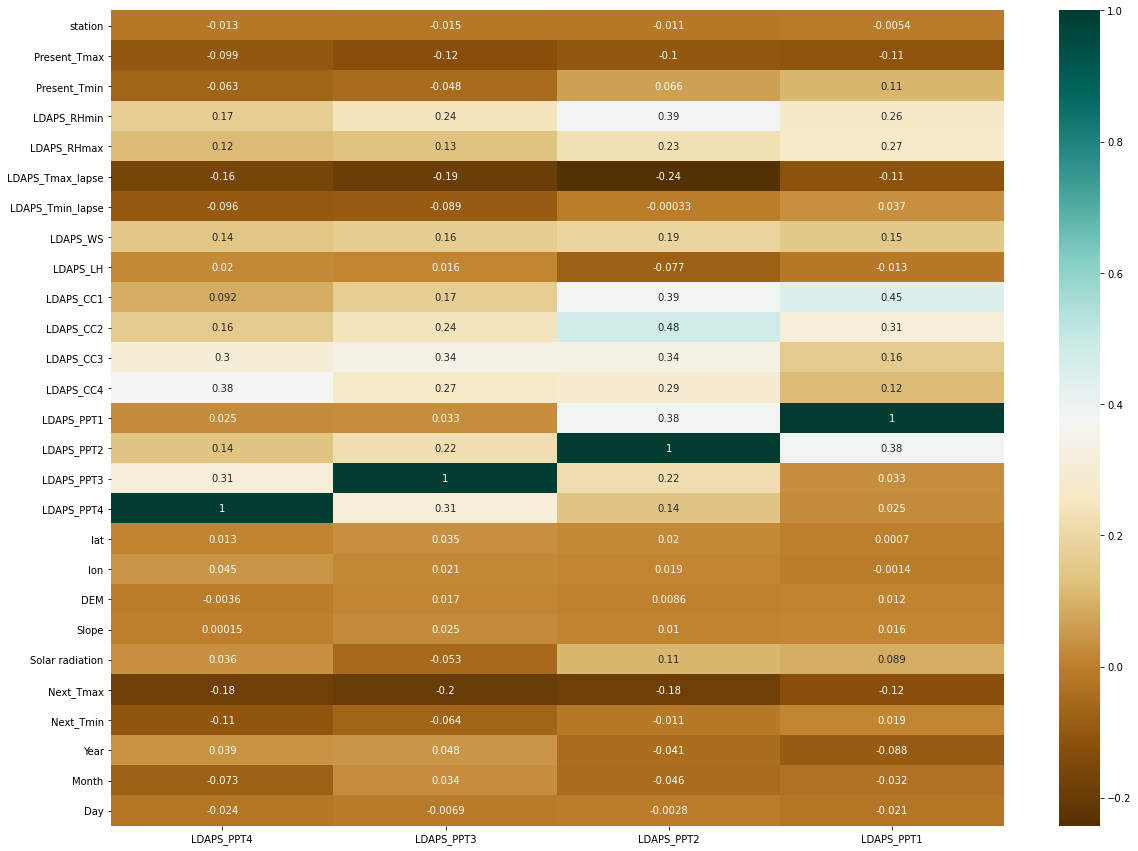

In [121]:
plt.figure(figsize = (20,15))
sb.heatmap(df.corr()[['LDAPS_PPT4', 'LDAPS_PPT3', 'LDAPS_PPT2','LDAPS_PPT1']], annot=True, cmap='BrBG')

Observation:    
    
    We can see that the highest positive correlation between the values are not even 0.5.
    The highest negative correlation is -0.2
    
    I am not sure if the high number of '0' values and lack of correlation between the other factors will affect the model, but it doesn't sound logical to remove these four columns. Hence I'll keep all 4. 

### Plotting

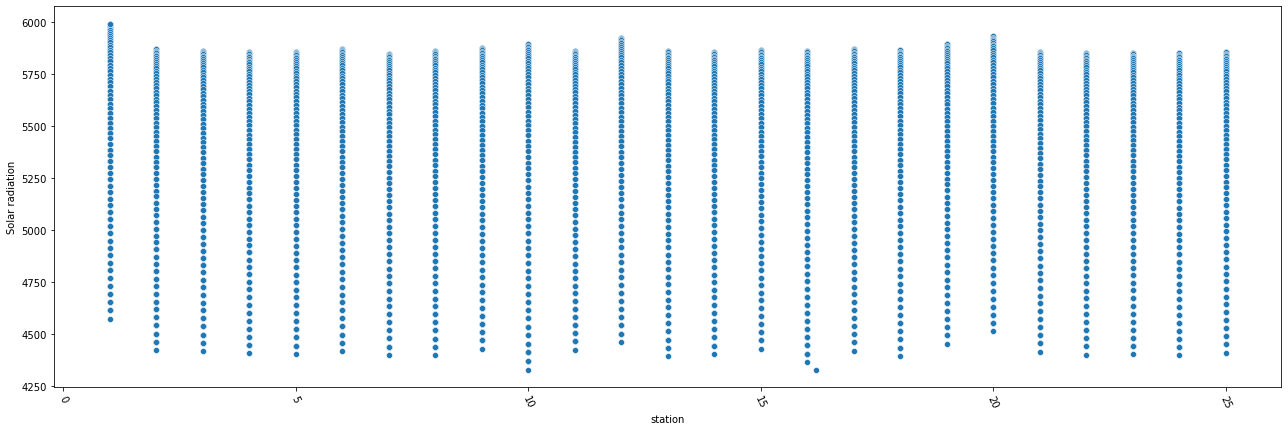

In [122]:
plt.figure(figsize = (22,7))
sb.scatterplot(y="Solar radiation", x="station", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the solar radiation received in each station is pretty much the same with a bit of higher radiation received in 1, 13, and 20th stations. 

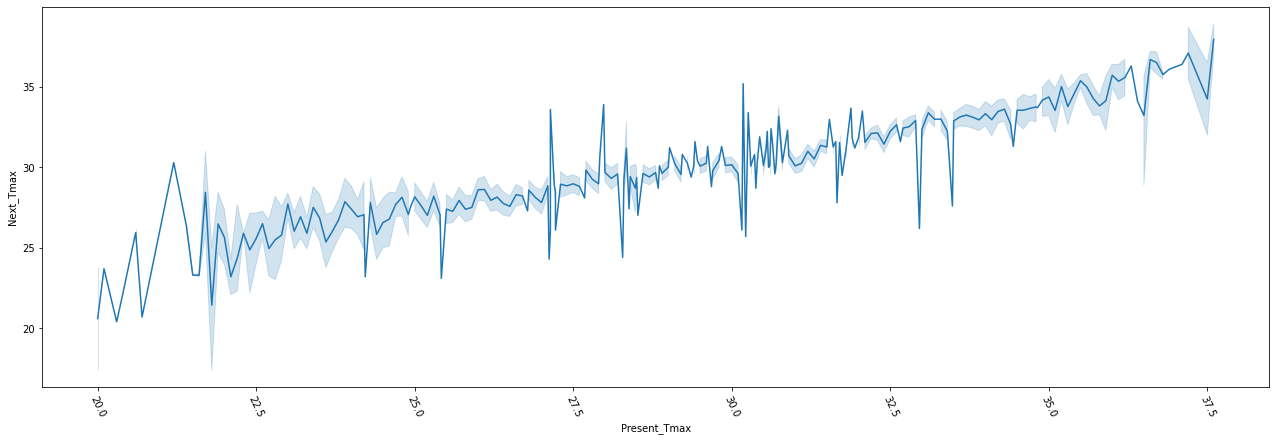

In [123]:
plt.figure(figsize = (22,7))
sb.lineplot(y="Next_Tmax", x="Present_Tmax", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    This plot shows the difference in variation between the present temperature and the next temperature. 

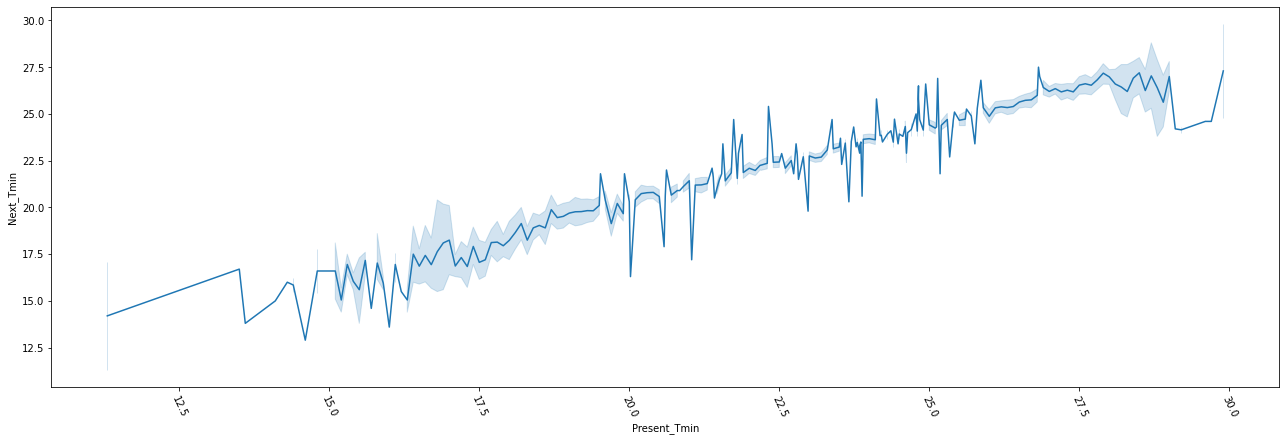

In [124]:
plt.figure(figsize = (22,7))
sb.lineplot(y="Next_Tmin", x="Present_Tmin", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    This plot shows the difference between the predicted and the next minimum values. 

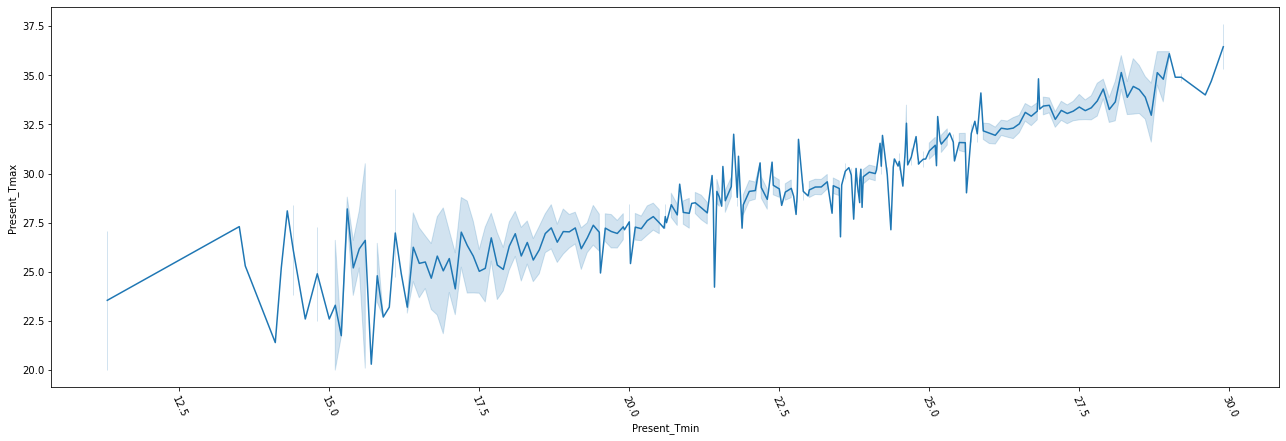

In [125]:
plt.figure(figsize = (22,7))
sb.lineplot(y="Present_Tmax", x="Present_Tmin", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    This plot shows the difference in the minimum and maximum values per day.

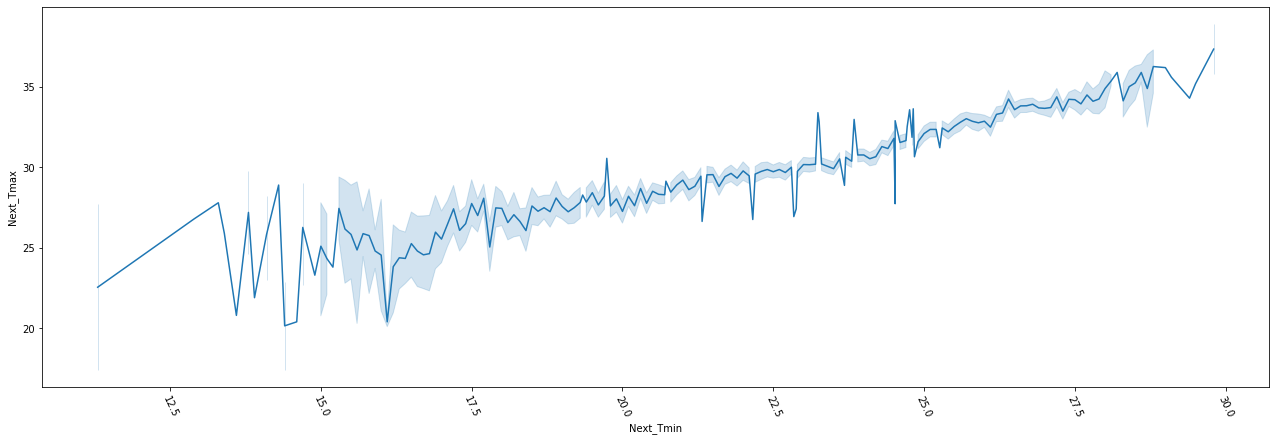

In [126]:
plt.figure(figsize = (22,7))
sb.lineplot(y="Next_Tmax", x="Next_Tmin", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    This plot shows the difference in the predicted minimum and maximum temperatures. 
 

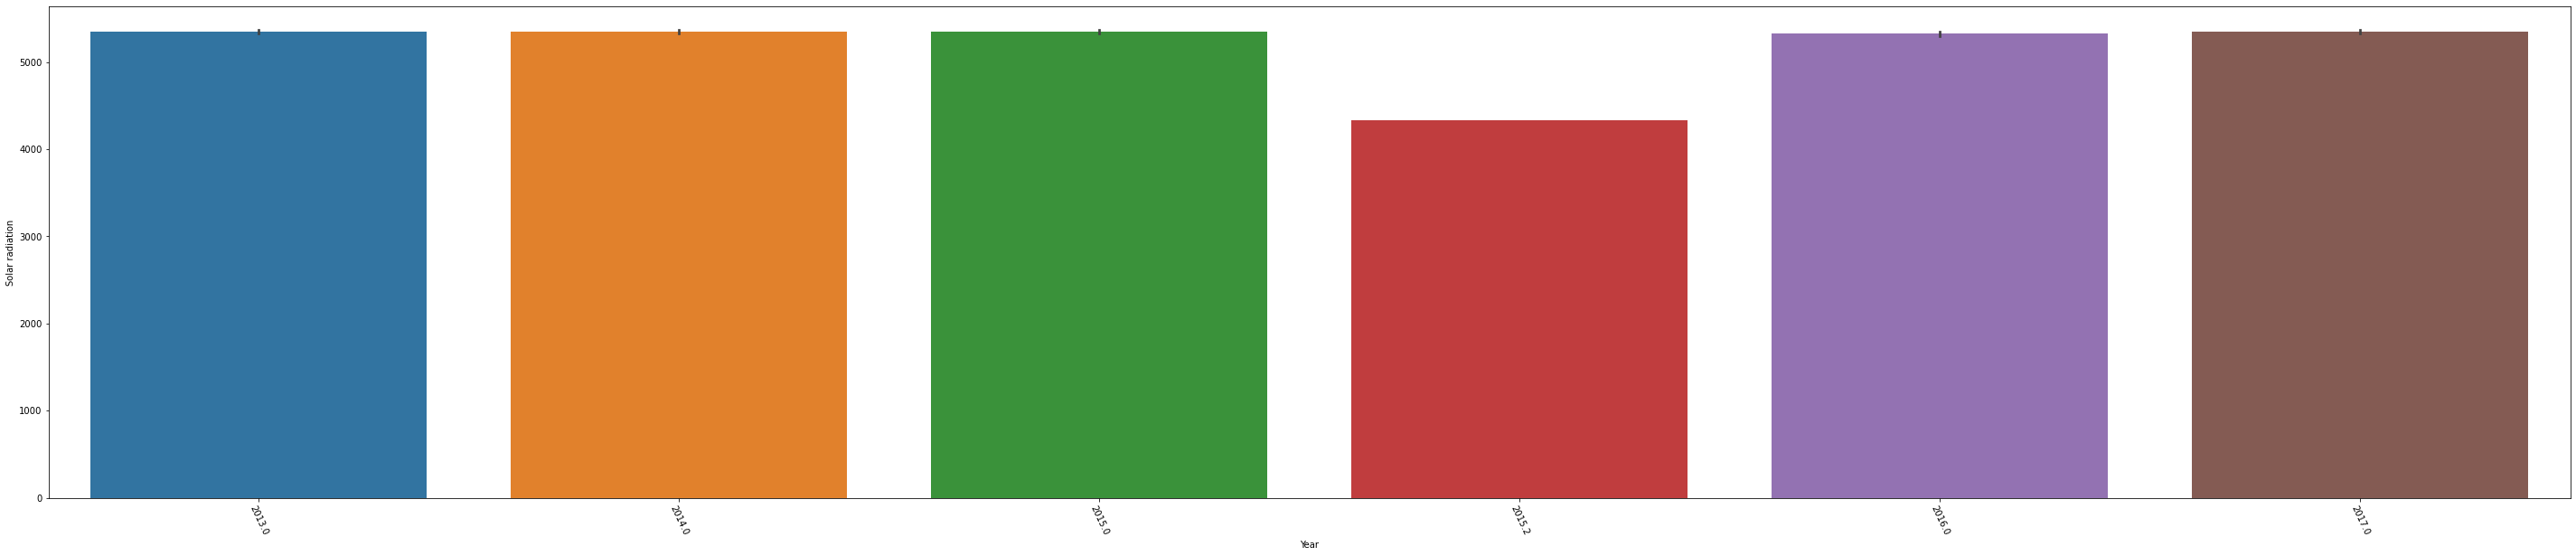

In [127]:
plt.figure(figsize = (50,10))
sb.barplot(x = 'Year', y ='Solar radiation', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the total solar radiation received in this location stayed stable except for the year 2015

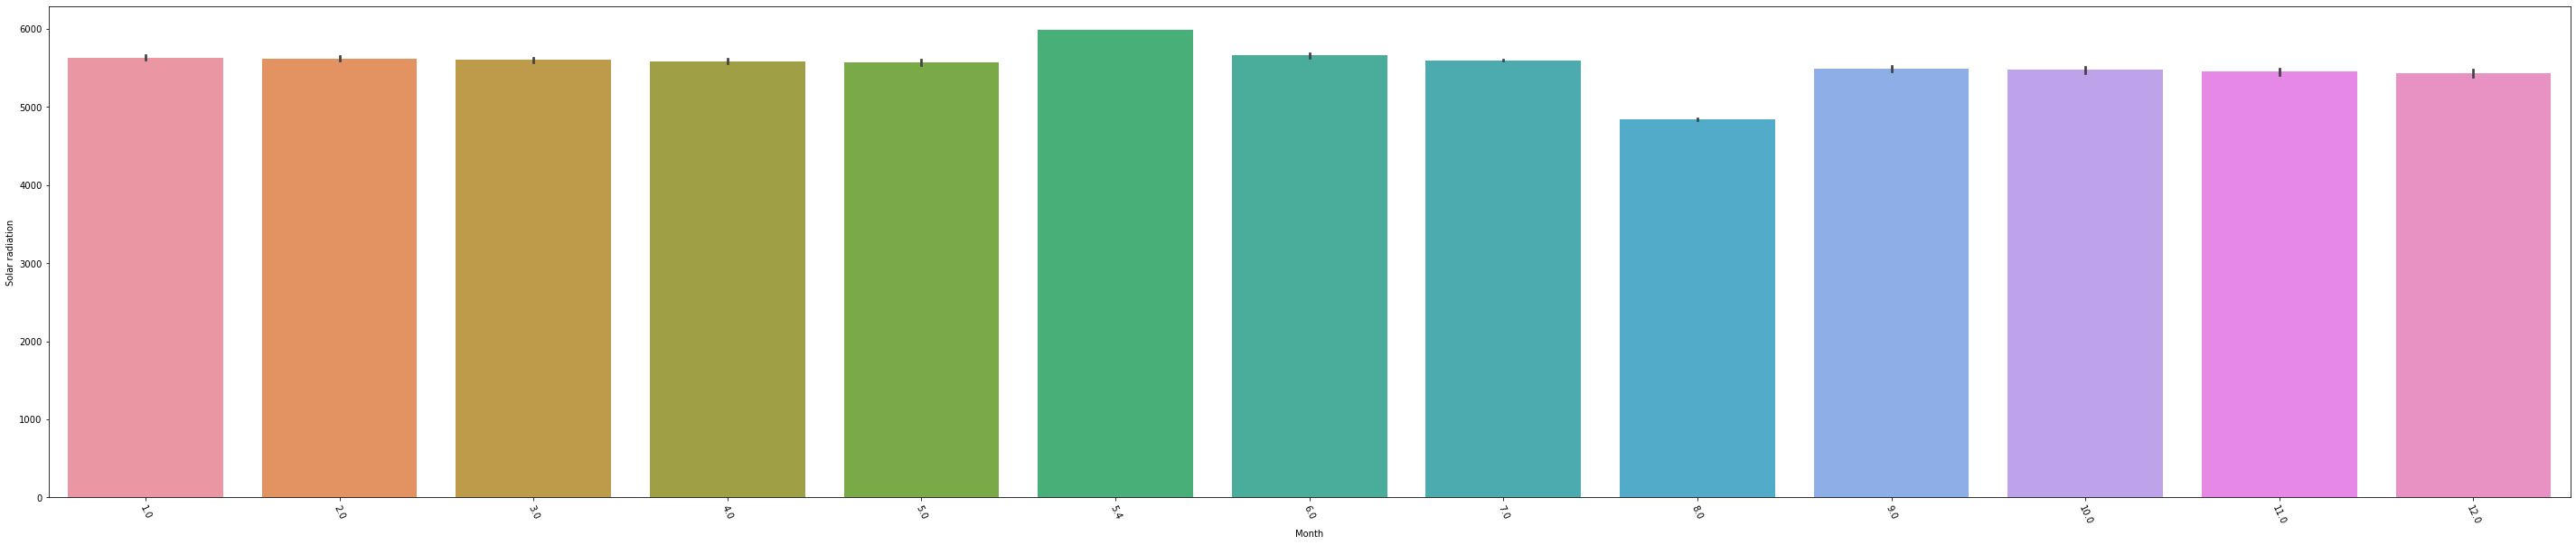

In [128]:
plt.figure(figsize = (50,10))
sb.barplot(x = 'Month', y ='Solar radiation', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the lowest amount of radiation is recorded in August.
    The highest radiation is for June and July.  

54.599834    3
19.794666    2
52.121852    2
49.382062    2
71.658089    2
            ..
53.233074    1
68.617836    1
53.693214    1
64.671288    1
56.417843    1
Name: LDAPS_RHmin, Length: 7743, dtype: int64


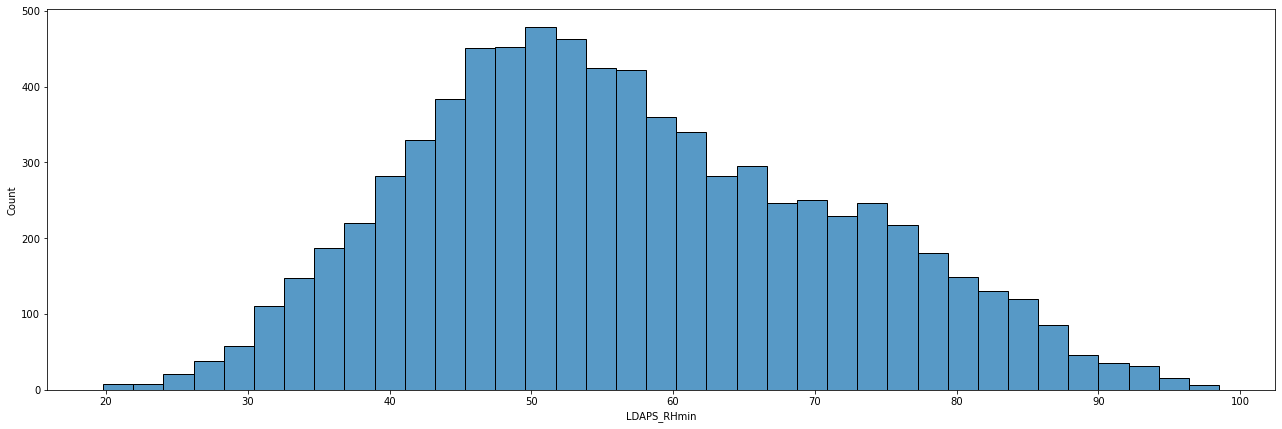

84.807553    3
94.795967    2
96.525200    2
88.324631    2
88.938194    2
            ..
84.353996    1
85.771858    1
89.319427    1
91.019920    1
92.446472    1
Name: LDAPS_RHmax, Length: 7734, dtype: int64


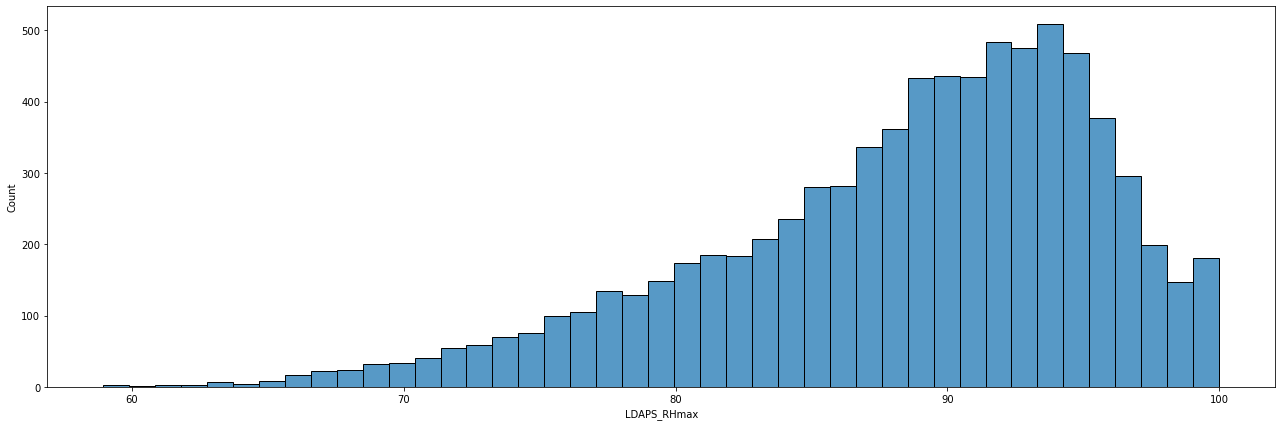

32.196252    3
32.296093    2
38.542255    2
17.624954    2
32.919993    2
            ..
31.703926    1
27.390573    1
30.491629    1
26.700805    1
29.405268    1
Name: LDAPS_Tmax_lapse, Length: 7745, dtype: int64


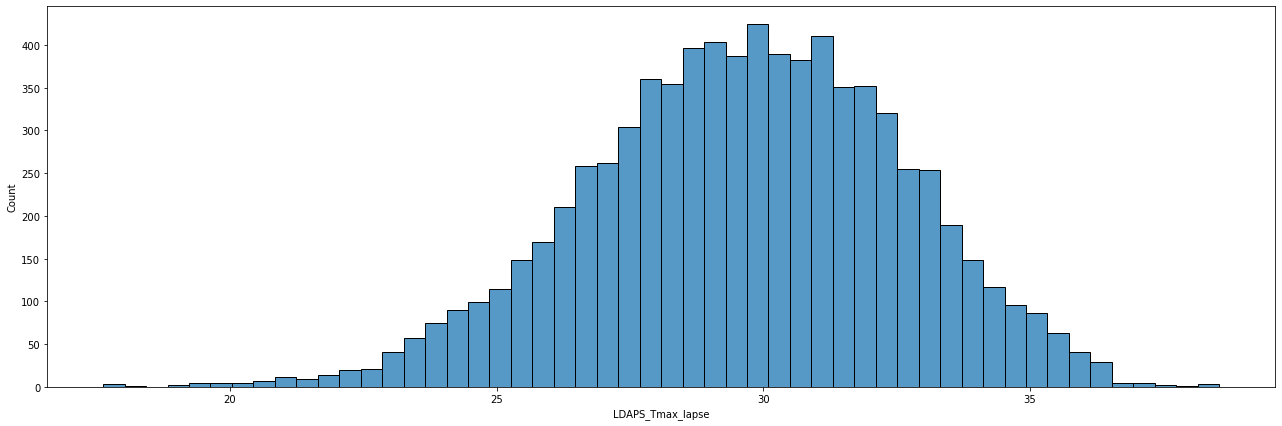

25.819196    3
29.619342    2
25.045958    2
25.815622    2
14.272646    2
            ..
23.598908    1
16.667724    1
22.482685    1
23.706379    1
22.554425    1
Name: LDAPS_Tmin_lapse, Length: 7745, dtype: int64


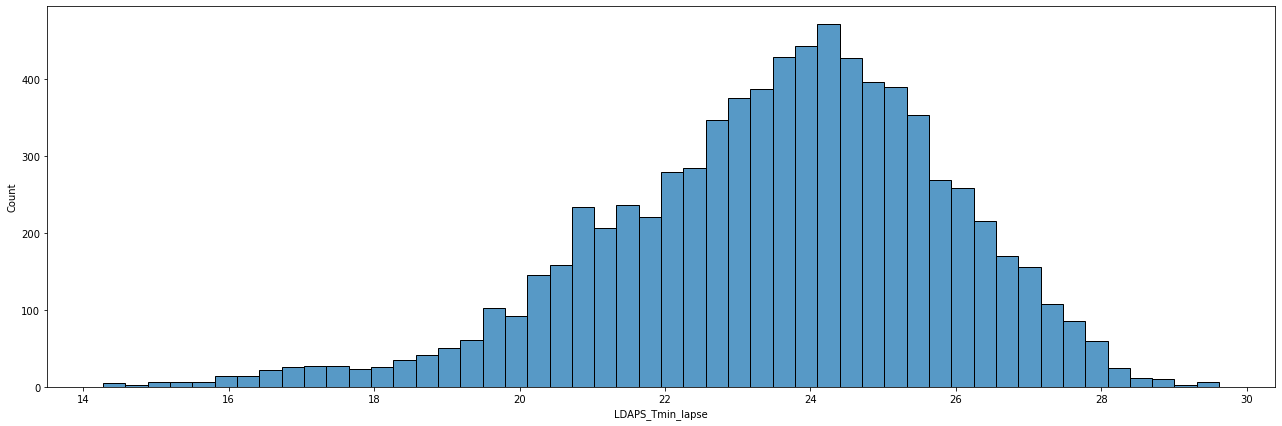

6.354137     2
2.882580     2
5.594950     2
21.857621    2
6.199460     2
            ..
6.924087     1
5.491834     1
8.241521     1
13.649393    1
5.009154     1
Name: LDAPS_WS, Length: 7746, dtype: int64


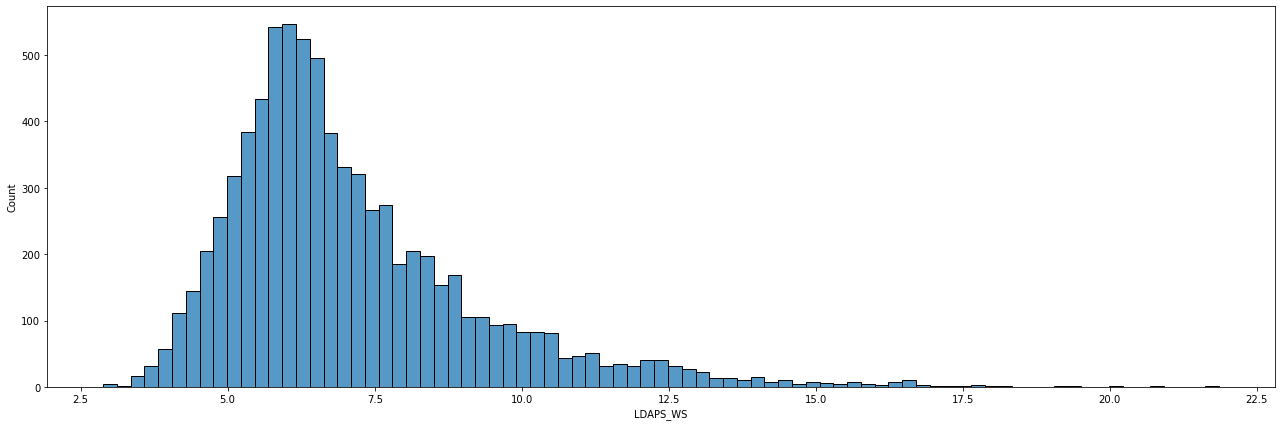

 213.414006    2
 46.405275     2
 21.046900     2
-13.603212     2
 63.934675     2
              ..
 117.837212    1
 66.655449     1
 86.062433     1
 58.363858     1
 24.522529     1
Name: LDAPS_LH, Length: 7747, dtype: int64


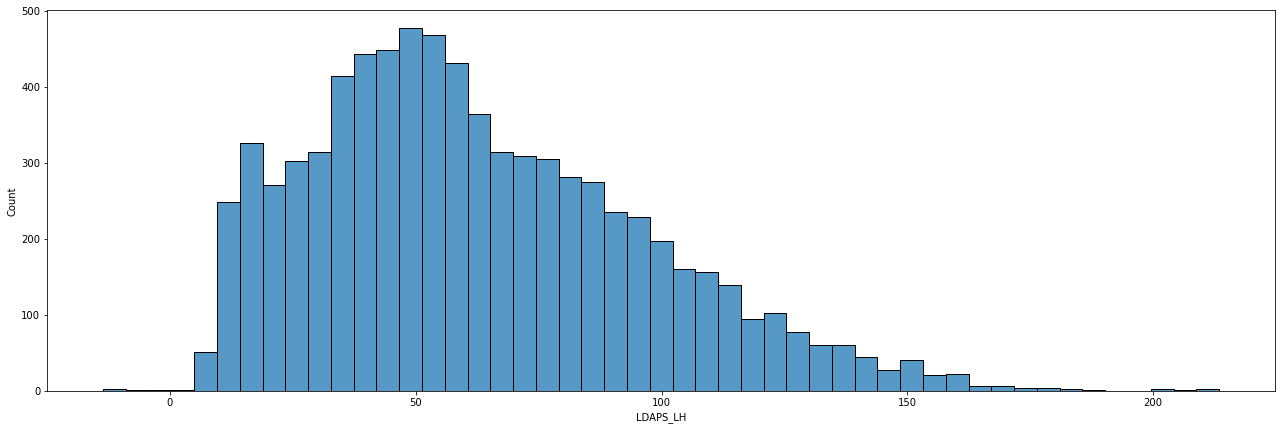

0.000000    108
0.263226      2
0.504230      2
0.967277      2
0.473578      2
           ... 
0.306375      1
0.007780      1
0.164933      1
0.378470      1
0.012819      1
Name: LDAPS_CC1, Length: 7640, dtype: int64


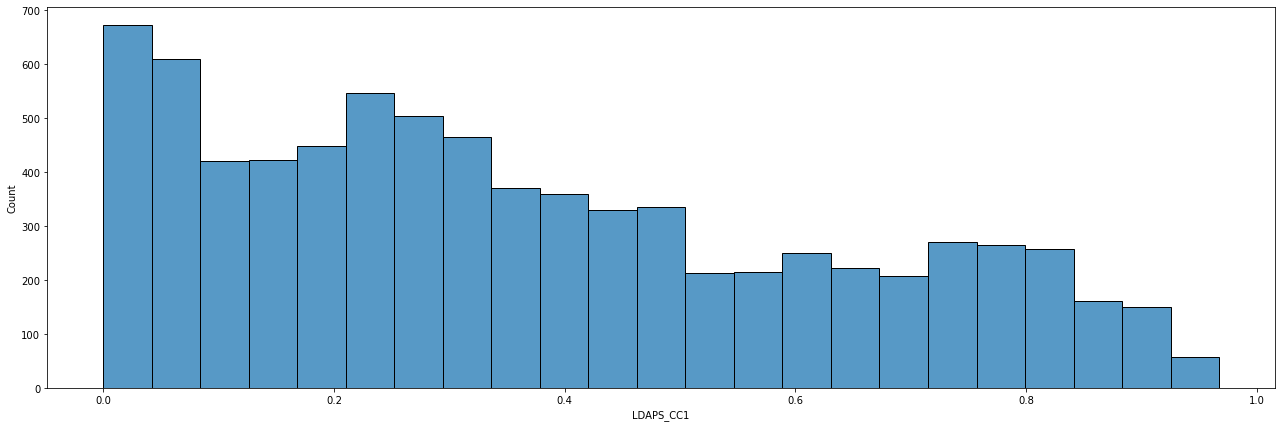

0.000000    95
0.376747     3
0.968353     2
0.383295     2
0.233050     2
            ..
0.017646     1
0.025537     1
0.278383     1
0.377259     1
0.092348     1
Name: LDAPS_CC2, Length: 7653, dtype: int64


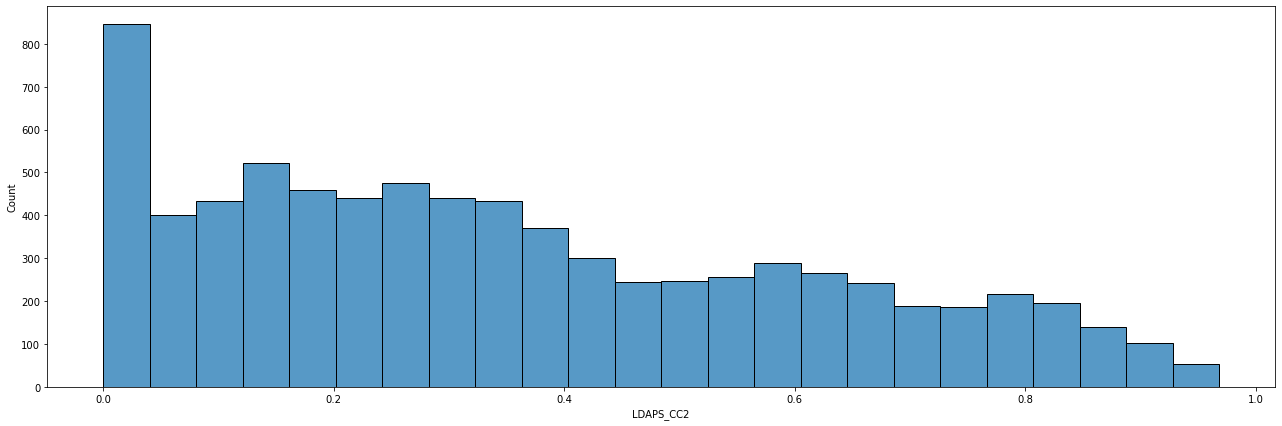

0.000000    76
0.220156     3
0.000868     2
0.235800     2
0.983789     2
            ..
0.256839     1
0.327335     1
0.705475     1
0.058720     1
0.490755     1
Name: LDAPS_CC3, Length: 7669, dtype: int64


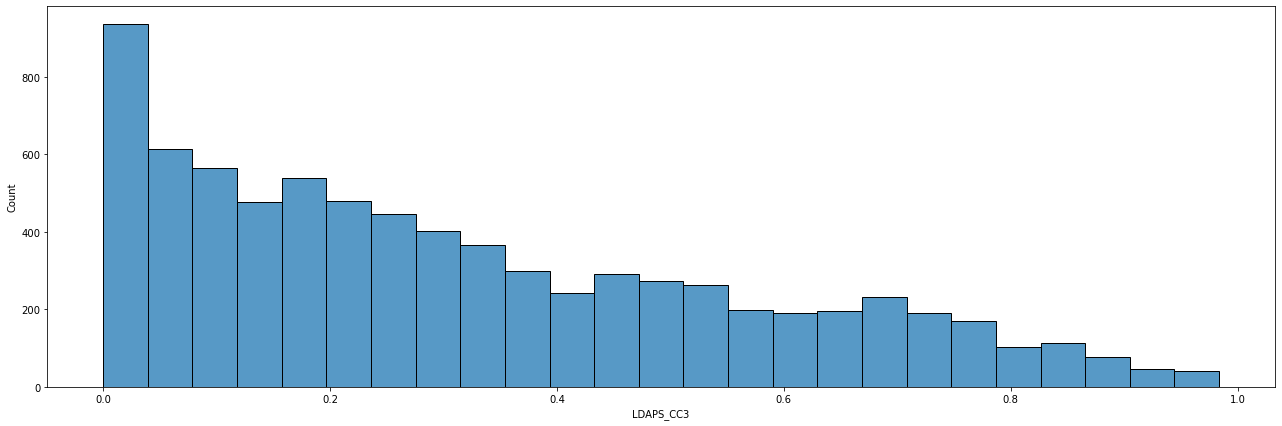

0.000000    137
0.002604      7
0.005208      3
0.001736      3
0.144145      3
           ... 
0.302367      1
0.294010      1
0.501325      1
0.119798      1
0.241679      1
Name: LDAPS_CC4, Length: 7594, dtype: int64


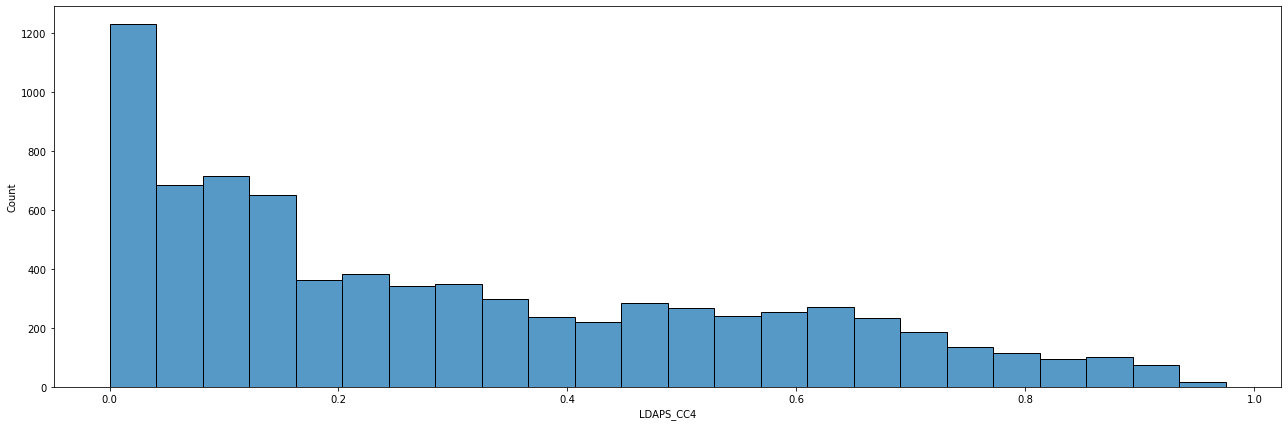

In [129]:
plot = ['LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 
   'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4']
for i in plot: 
    plt.figure(figsize = (22,7))
    ax = sb.histplot(x = i, data = df)
    print(df[i].value_counts())
    plt.show()

Observation: 

    We can see that there is skewness in some of the plots. 
    
    LDAPS_RHmin	- The values are normally distributed. The chances of minimum humidity is average. 
    LDAPS_RHmax	 - The graph is right skewed/left tailed, and this will need to be normalized. The chances of high humidity is low. 
    LDAPS_Tmax_lapse - The graph looks normally distributed.The graph shows the chances of high temp the next day.  
    LDAPS_Tmin_lapse - The graph looks normally distributed, but there are outliers that needs to be checked.  	
    LDAPS_WS - The graph is skewed - needs to be normalized. This plot shows the chances of high windspeed the next day. 
    LDAPS_LH - There are outliers in this graph. This plot shows the latent heat flux.	
    
    Next day day forecasts with a 6 hour split. 
    LDAPS_CC1 - The graph looks normal. 	
    LDAPS_CC2 - There are outliers in the graph. 	
    LDAPS_CC3 - There are outliers in the graph.
    LDAPS_CC4 - There are outliers in the graph. 	
    

### Summary

In [130]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.00000
mean,12.998865,29.769249,23.226713,56.712966,88.369128,29.633310,23.526105,7.089773,62.527477,0.368300,0.355391,0.317208,0.298383,0.588571,0.481462,0.276908,0.266969,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275544,22.934450,2015.000155,7.080547,16.37211
std,7.212017,2.963391,2.408518,14.620018,7.168515,2.941858,2.339946,2.176008,33.645225,0.261542,0.257110,0.249503,0.253477,1.937142,1.754790,1.156669,1.200630,0.050352,0.079435,54.279780,1.370444,429.158867,3.125852,2.485431,1.414170,2.238181,8.24190
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.00000
25%,7.000000,27.800000,21.700000,45.973853,84.246307,27.693091,22.114651,5.680214,37.412333,0.148273,0.142199,0.103060,0.082665,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.380000,2014.000000,7.000000,8.00000
50%,13.000000,29.900000,23.400000,54.959623,89.750568,29.744207,23.771672,6.540041,56.953214,0.314835,0.311353,0.259830,0.226880,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.00000
75%,19.000000,32.000000,24.900000,67.078279,93.711344,31.734400,25.162746,8.009219,84.192035,0.571811,0.554963,0.494007,0.497230,0.054383,0.020037,0.008591,0.000133,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.00000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.00000


<AxesSubplot:>

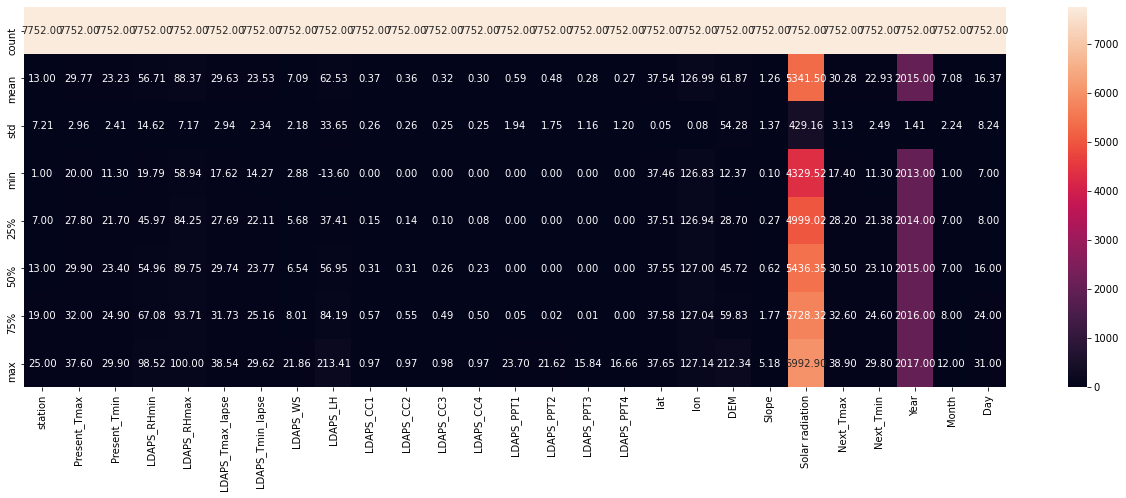

In [131]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

Observation: 
    
    We can see that the only high difference in values for the mean and max are in: 
      Solar Radiation
      Year
   
    We can safely ignore the year, as the value is categorical. 
    All the other columns looks normal. 

### Correlation

In [132]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
station,1.000000,0.111977,0.130793,-0.068286,-0.169880,0.069209,0.105267,0.003466,-0.136223,0.006461,0.002836,0.000172,0.005790,-0.005350,-0.010968,-0.015490,-0.013331,-0.237984,-0.119189,-0.256428,-0.090706,-0.019458,0.106113,0.127033,-0.000144,0.000185,0.000219
Present_Tmax,0.111977,1.000000,0.619082,-0.208099,-0.303987,0.575555,0.628712,-0.126141,0.136643,-0.312128,-0.215699,-0.149818,-0.142690,-0.110563,-0.101938,-0.122002,-0.099005,-0.053182,0.007994,-0.188616,-0.107051,-0.027473,0.612460,0.623924,0.060485,-0.001022,-0.145105
Present_Tmin,0.130793,0.619082,1.000000,0.118907,-0.017163,0.473219,0.771151,-0.040794,-0.007617,0.082155,0.086708,-0.010017,-0.049598,0.109754,0.065513,-0.047789,-0.063393,-0.079075,-0.044231,-0.251891,-0.147330,0.051563,0.473128,0.798760,0.036438,-0.003190,-0.111193
LDAPS_RHmin,-0.068286,-0.208099,0.118907,1.000000,0.579102,-0.565266,0.087108,0.295407,-0.069368,0.613923,0.745492,0.689613,0.513140,0.263096,0.391154,0.240606,0.169009,0.087941,-0.076673,0.102892,0.124598,0.246946,-0.443850,0.092158,-0.000820,-0.057095,-0.065166
LDAPS_RHmax,-0.169880,-0.303987,-0.017163,0.579102,1.000000,-0.373480,-0.115579,0.135456,0.240227,0.435453,0.390516,0.226783,0.129124,0.268419,0.228968,0.134456,0.117817,0.197582,0.025747,0.178312,0.220731,0.150780,-0.285897,-0.074559,-0.143430,-0.040100,-0.015130
LDAPS_Tmax_lapse,0.069209,0.575555,0.473219,-0.565266,-0.373480,1.000000,0.655365,-0.313829,0.046863,-0.437941,-0.523415,-0.542163,-0.429506,-0.112023,-0.242860,-0.188127,-0.161167,-0.042804,0.090894,-0.180682,-0.163745,0.044124,0.834871,0.592674,0.016137,-0.018203,-0.158539
LDAPS_Tmin_lapse,0.105267,0.628712,0.771151,0.087108,-0.115579,0.655365,1.000000,-0.131945,-0.134880,0.010643,0.046785,-0.046346,-0.081141,0.036897,-0.000330,-0.088816,-0.095566,-0.097047,-0.026923,-0.197330,-0.187257,0.156772,0.593226,0.885756,-0.002803,-0.025676,-0.174118
LDAPS_WS,0.003466,-0.126141,-0.040794,0.295407,0.135456,-0.313829,-0.131945,1.000000,0.006104,0.289830,0.261946,0.244466,0.220940,0.153193,0.192476,0.161851,0.144695,0.036694,-0.059253,0.193031,0.173084,0.124307,-0.349295,-0.101504,-0.110551,-0.084279,-0.030785
LDAPS_LH,-0.136223,0.136643,-0.007617,-0.069368,0.240227,0.046863,-0.134880,0.006104,1.000000,-0.147413,-0.263739,-0.245143,-0.172622,-0.012506,-0.077358,0.015608,0.019813,0.134166,0.025503,0.055475,0.087201,-0.047632,0.158710,-0.055486,0.056223,-0.022280,-0.013770
LDAPS_CC1,0.006461,-0.312128,0.082155,0.613923,0.435453,-0.437941,0.010643,0.289830,-0.147413,1.000000,0.779984,0.517463,0.360736,0.446341,0.389387,0.168907,0.091987,-0.008254,-0.006736,-0.014202,-0.020810,0.220507,-0.456639,-0.012000,-0.062848,-0.079813,-0.016234


<AxesSubplot:>

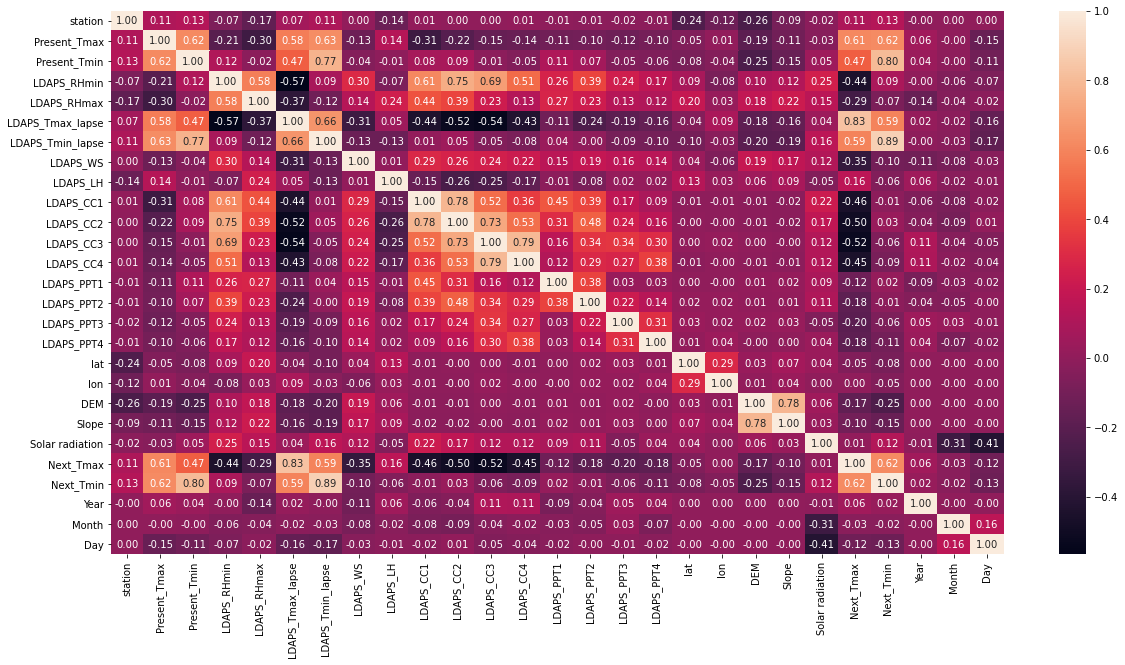

In [133]:
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

    Since this graph is too complicated to understand, we will split this to two graphs:
        One that shows high negative correlation. 
        One that shows high positive correlation. 

<AxesSubplot:>

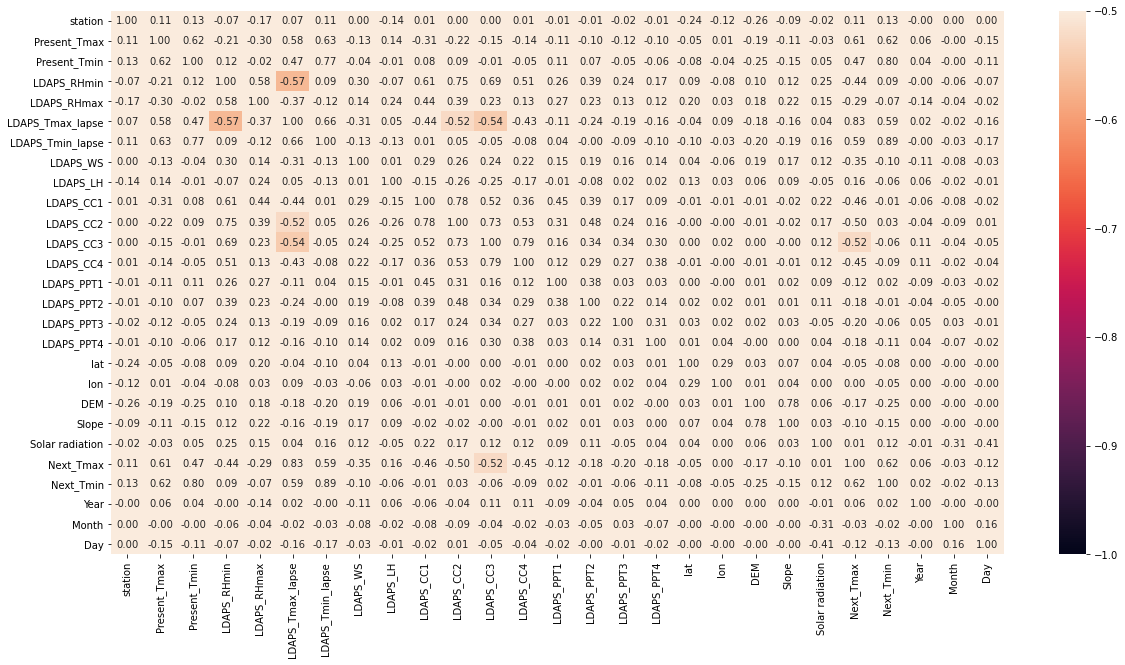

In [134]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -0.5, vmax = -1)

Observation: 

    We can see that there is a high negative correlation between: 
      LDAPS_Tmax_lapse & LDAPS_RHmin
      LDAPS_Tmax_lapse & LDAPS_CC3
      LDAPS_Tmax_lapse & LDAPS_CC2
      Next_Tmax & LDAPS_CC3    
        
    There are no high negative correlation between any other values. 

<AxesSubplot:>

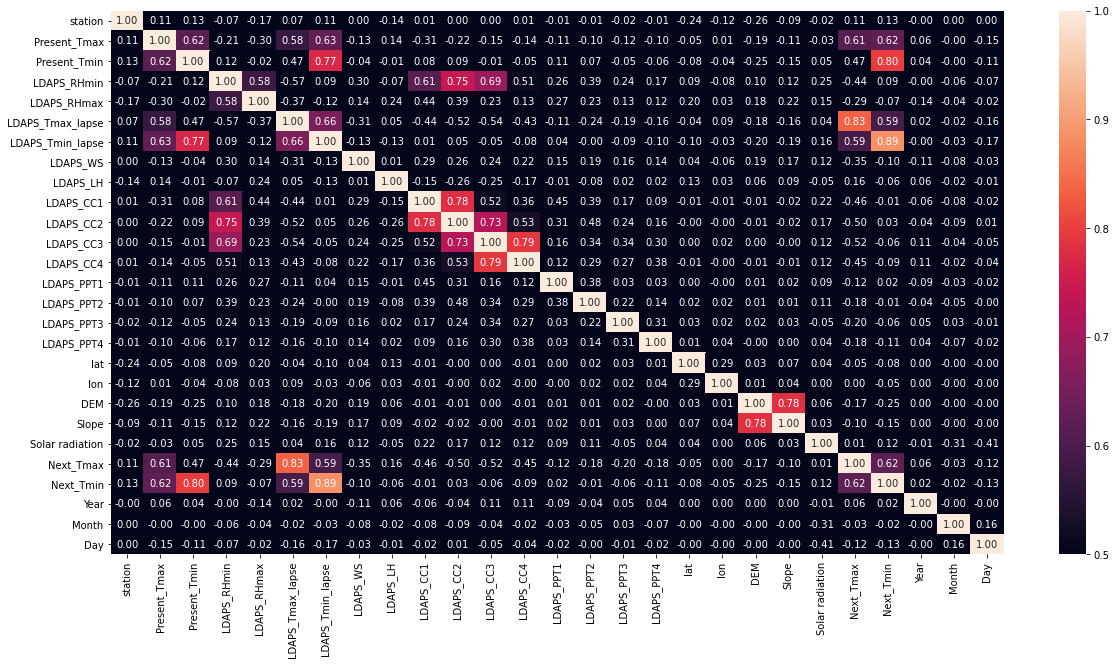

In [135]:
#Highlighting all the values greater than 0.5
#Plot to highlight high positive correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.5, vmax = 1)

Observation: 
    There is high positive correlation in the range of 0.8 for:
        Present_Tmin & Next_Tmin
        LDAPS_Tmax_lapse & Next_Tmax
        LDAPS_Tmin_lapse & Next_Tmin
        
    There is high positive correlation in the rage of 0.7 for: 
         LDAPS_CC2 & LDAPS_RHmin
         LDAPS_Tmin_lapse & Present_Tmin
         LDAPS_CC2 & LDAPS_CC1
         LDAPS_CC2 & LDAPS_CC3
         LDAPS_CC4 & LDAPS_CC3
         Slope & DEM
         
    There is high positive correlation in the range of 0.6 for: 
        Next_Tmin & Present_Tmax
        Next_Tmax & Present_Tmax
        LDAPS_RHmin & LDAPS_CC3
        LDAPS_RHmin & LDAPS_CC1
        LDAPS_Tmin_lapse & Present_Tmax
        LDAPS_Tmax_lapse & Present_Tmax
        Present_Tmax & Present_Tmin
        LDAPS_Tmin_lapse & LDAPS_Tmax_lapse
        Slope & DEM
        
    There is a high positive correlation in the range of 0.5 for: 
        LDAPS_Tmax_lapse & Present_Tmax
        LDAPS_RHmax & LDAPS_RHmax
        LDAPS_Tmax_lapse & Next_Tmin
        LDAPS_Tmin_lapse & Next_Tmax

### Checking for outliers. 

    Creating a set for continuous variables so that we can check for outliers and skewness. 

In [136]:
contin_cols = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 
 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Solar radiation', 
 'Next_Tmax', 'Next_Tmin']

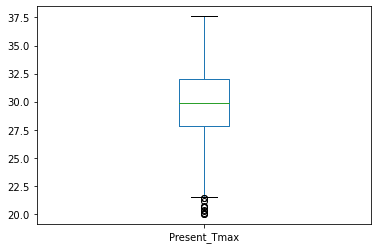

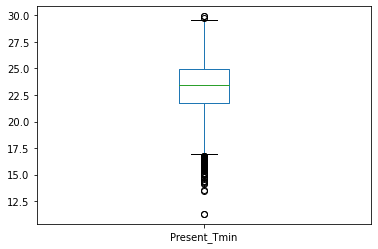

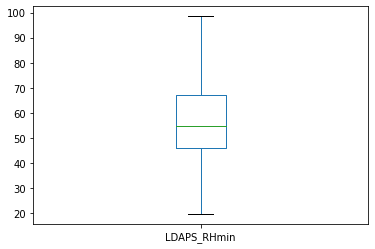

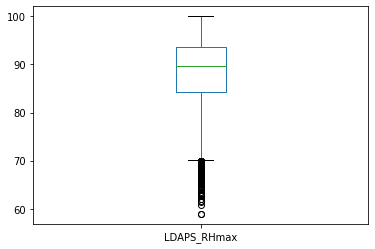

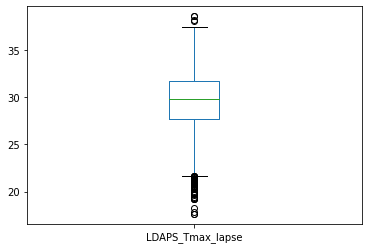

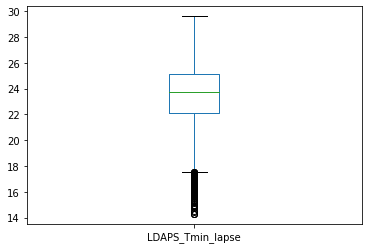

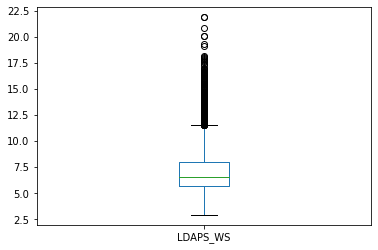

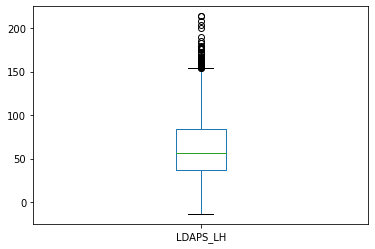

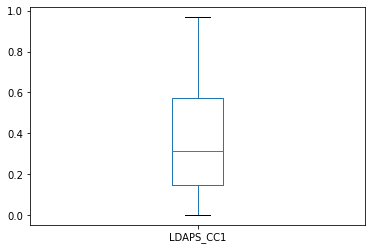

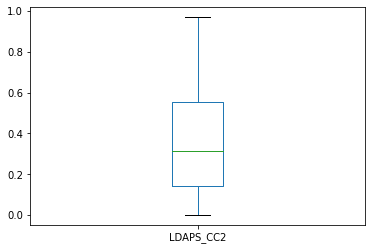

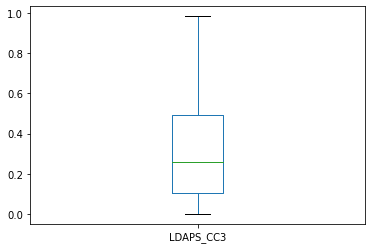

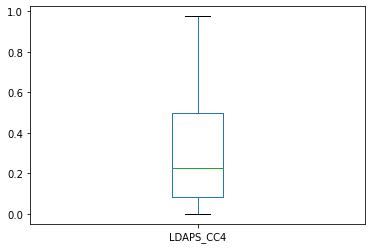

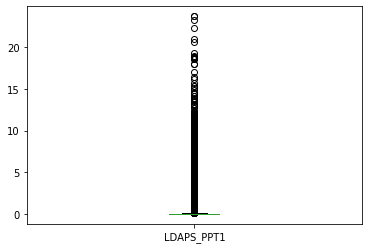

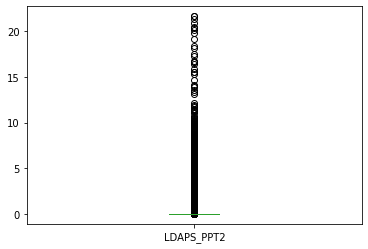

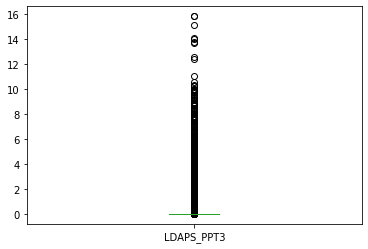

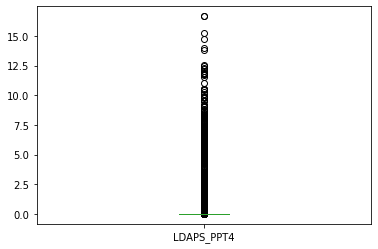

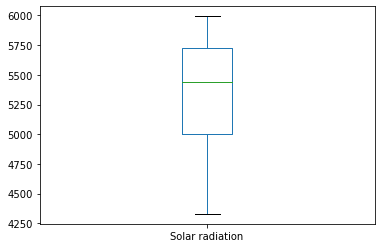

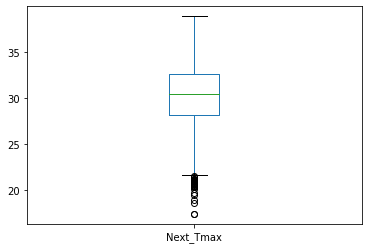

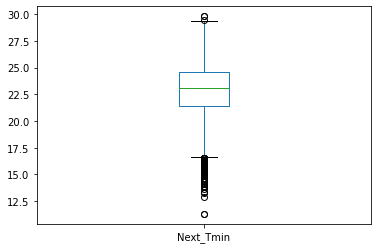

In [137]:
for i in contin_cols:
    df[i].plot.box()
    plt.show()

Observation: 
    
    We can see that there are outliers in: 
    Present_Tmax
    Present_Tmin
    LDAPS_RHmax
    LDAPS_Tmax_lapse
    LDAPS_Tmin_lapse
    LDAPS_WS
    LDAPS_LH
    LDAPS_PPT1
    LDAPS_PPT2
    LDAPS_PPT3
    LDAPS_PPT4
    Next_Tmax
    Next_Tmin
    
    This is a high number of columns with outliers. We will have to check the z_score

In [138]:
from scipy.stats import zscore

In [139]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))

In [140]:
df_new = df[(z<3).all(axis = 1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,2017.0,8.0,30.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,2017.0,8.0,30.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,2017.0,8.0,30.0


In [141]:
df_new.shape

(6897, 27)

In [142]:
df.shape

(7752, 27)

In [143]:
#Finding the percentage of dataloss

loss = ((7752-6897)/7752)*100
loss

11.029411764705882

    Since the data loss is above 11% we cannot afford to remove the outliers. Hence we will use IQR to normalize the outliers. 

    Hence, we can run two different models, one with outliers, and one without outliers. 

    The one with outliers will stay as df
    The one without outliers will be df_with_no_outlier

In [144]:
df_with_no_outlier = df_new

In [145]:
df_with_no_outlier.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [146]:
df_with_no_outlier.shape

(6897, 27)

### Checking for skewness

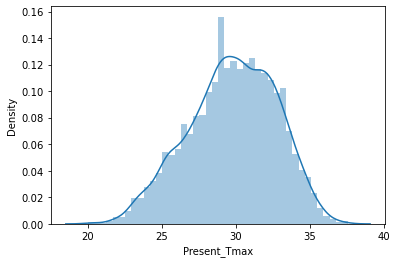

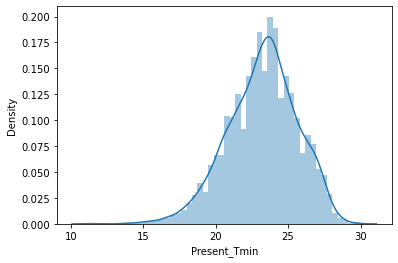

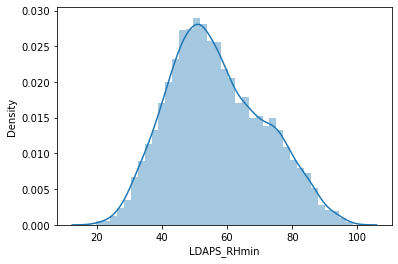

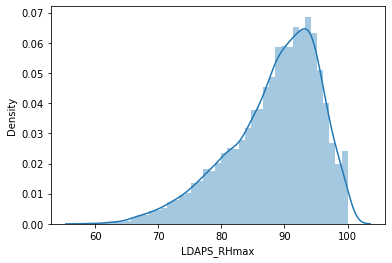

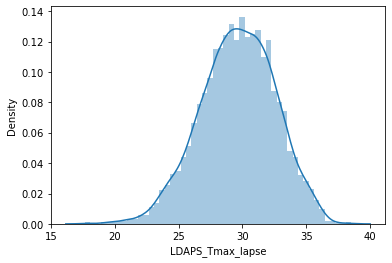

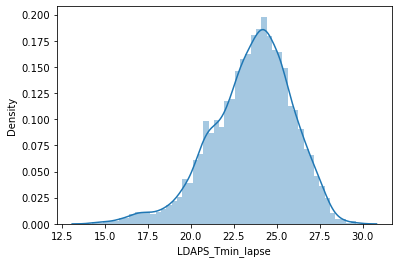

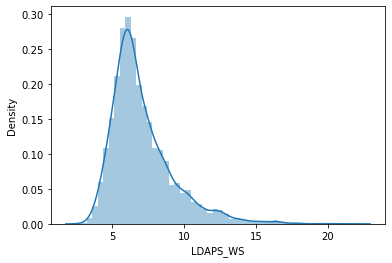

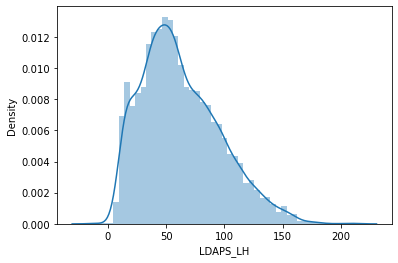

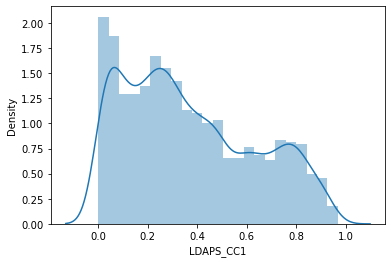

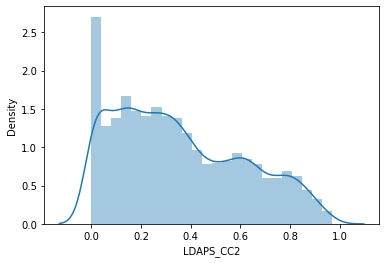

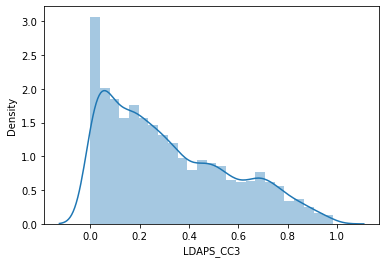

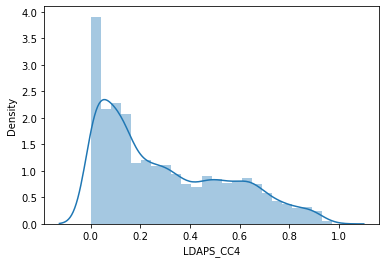

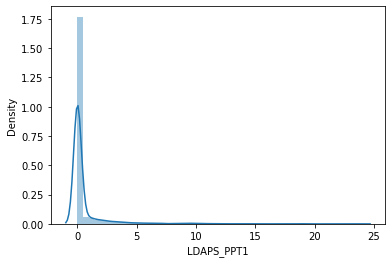

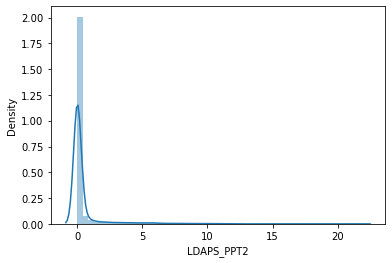

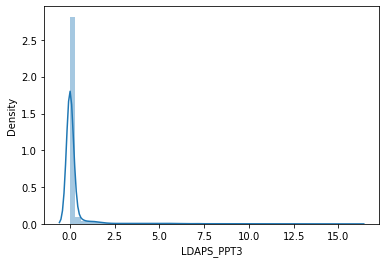

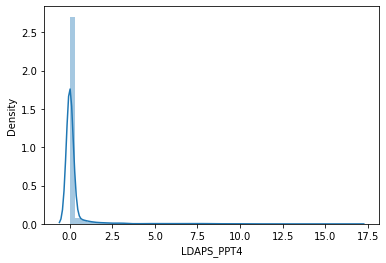

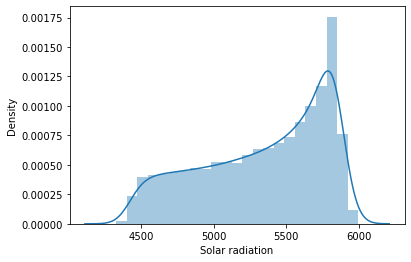

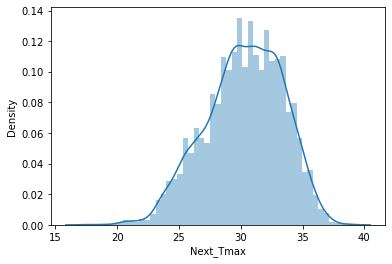

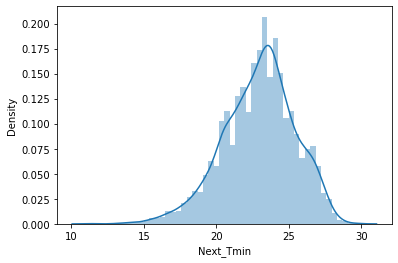

In [147]:
for i in contin_cols: 
    sb.distplot(df[i], kde = True)
    plt.show()

In [148]:
df.skew()

station            -0.000111
Present_Tmax       -0.263172
Present_Tmin       -0.366972
LDAPS_RHmin         0.306680
LDAPS_RHmax        -0.849100
LDAPS_Tmax_lapse   -0.240289
LDAPS_Tmin_lapse   -0.590007
LDAPS_WS            1.583093
LDAPS_LH            0.668231
LDAPS_CC1           0.462245
LDAPS_CC2           0.477772
LDAPS_CC3           0.650527
LDAPS_CC4           0.671576
LDAPS_PPT1          5.392290
LDAPS_PPT2          5.776056
LDAPS_PPT3          6.452470
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339739
Next_Tmin          -0.406029
Year               -0.000282
Month              -0.705146
Day                 0.245510
dtype: float64

Observation:
    
    We can see skewness in LDAPS_RHmax, LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4.
    Here we can either use cube-root or powertransformer(yeo-johnson) methods to remove the skewness. 

### Splitting X & Y

In [149]:
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [150]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013.0,6.0,30.0


In [151]:
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


In [152]:
#For df with the outliers removed
x_wo = df_with_no_outlier.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y_wo = df_with_no_outlier[['Next_Tmax', 'Next_Tmin']]

In [153]:
x_wo.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013.0,6.0,30.0


In [154]:
y_wo.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


### Handling the skewness in X

In [155]:
from sklearn.preprocessing import PowerTransformer

In [156]:
#Removing the skewness in the x variable (with outliers)
pt = PowerTransformer(method='yeo-johnson')

In [157]:
x = pt.fit_transform(x)
x_wo = pt.fit_transform(x_wo)

In [158]:
x_cols = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Year', 'Month', 'Day']

In [159]:
x = pd.DataFrame(x, columns = x_cols)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.859780,-0.408480,-0.796919,0.177609,0.273125,-0.563788,-0.319975,0.100425,0.309679,-0.407959,-0.501250,-0.533096,-0.578249,-0.561657,-0.523568,-0.496929,-0.446026,0.0,-0.027632,1.834978,1.314153,1.849430,-1.414465,-0.582312,1.418607
1,-1.647833,0.702900,-0.719541,-0.236202,0.186248,0.034292,0.135699,-0.618907,-0.211122,-0.447062,-0.278163,-0.545589,-0.597103,-0.561657,-0.523568,-0.496929,-0.446026,0.0,0.497283,0.055979,-0.385336,1.400702,-1.414465,-0.582312,1.418607
2,-1.454324,0.593734,-0.028752,-0.495825,-0.771297,0.117560,0.385617,-0.307808,-1.372196,-0.523240,-0.252570,-0.307932,-0.513363,-0.561657,-0.523568,-0.496929,-0.446026,0.0,0.836548,-0.364575,-0.949164,1.380650,-1.414465,-0.582312,1.418607
3,-1.273463,0.739518,0.013736,0.176543,1.314025,-0.015993,-0.182444,-0.650135,0.203745,-0.489908,-0.396409,-0.536083,-0.558835,-0.561657,-0.523568,-0.496929,-0.446026,0.0,0.368125,0.084879,1.235263,1.357783,-1.414465,-0.582312,1.418607
4,-1.102081,0.521529,-0.601943,0.036714,0.111557,-0.217322,-0.112047,-0.587120,1.297106,-0.810987,-0.286181,-0.439534,-0.358611,-0.561657,-0.523568,-0.496929,-0.446026,0.0,1.871193,-0.290442,-0.401730,1.366748,-1.414465,-0.582312,1.418607


In [160]:
x_wo = pd.DataFrame(x_wo, columns = x_cols)
x_wo.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.871161,-0.480902,-0.847404,0.261086,0.348095,-0.682225,-0.367215,0.179043,0.347609,-0.310397,-0.428899,-0.461095,-0.514173,-0.528452,-0.488876,-0.466139,-0.41484,0.0,-0.019997,1.854411,1.329637,1.889291,0.0,-0.583813,1.419717
1,-1.658603,0.665534,-0.765729,-0.171062,0.260555,-0.042357,0.100776,-0.576227,-0.170916,-0.351767,-0.194548,-0.474431,-0.534442,-0.528452,-0.488876,-0.466139,-0.41484,0.0,0.503362,0.069695,-0.374203,1.434084,0.0,-0.583813,1.419717
2,-1.464532,0.552522,-0.046632,-0.441918,-0.723156,0.045724,0.354257,-0.251849,-1.385413,-0.432632,-0.167720,-0.221611,-0.444535,-0.528452,-0.488876,-0.466139,-0.41484,0.0,0.841623,-0.353347,-0.943116,1.413731,0.0,-0.583813,1.419717
3,-1.283141,0.703460,-0.002953,0.259973,1.379796,-0.095662,-0.225128,-0.608608,0.243178,-0.397205,-0.318653,-0.464282,-0.493318,-0.528452,-0.488876,-0.466139,-0.41484,0.0,0.374587,0.098752,1.251068,1.390520,0.0,-0.583813,1.419717
4,-1.111255,0.477819,-0.642058,0.113889,0.185092,-0.309970,-0.152687,-0.543234,1.299432,-0.741269,-0.202954,-0.361381,-0.279203,-0.528452,-0.488876,-0.466139,-0.41484,0.0,1.873207,-0.278748,-0.390725,1.399621,0.0,-0.583813,1.419717


In [161]:
x.skew()

station            -0.204710
Present_Tmax       -0.036078
Present_Tmin       -0.013699
LDAPS_RHmin        -0.017200
LDAPS_RHmax        -0.116473
LDAPS_Tmax_lapse   -0.011809
LDAPS_Tmin_lapse   -0.021195
LDAPS_WS            0.003522
LDAPS_LH            0.055268
LDAPS_CC1           0.048560
LDAPS_CC2           0.047504
LDAPS_CC3           0.092295
LDAPS_CC4           0.131077
LDAPS_PPT1          1.446305
LDAPS_PPT2          1.628709
LDAPS_PPT3          1.804874
LDAPS_PPT4          2.052019
lat                 0.000000
lon                -0.198429
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Year               -0.000298
Month               0.043745
Day                -0.041816
dtype: float64

### Scaling

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
ss = StandardScaler()

In [164]:
x = ss.fit_transform(x)
x_wo = ss.fit_transform(x_wo)

In [165]:
x = pd.DataFrame(x, columns = x_cols)
x_wo = pd.DataFrame(x_wo, columns = x_cols)

### Importing the Models

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [167]:
#SupportVectorMachine (SVM) will not work with Multioutput regression

In [168]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

##### Running the model with outliers

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 77)

In [170]:
x_train.shape

(5426, 25)

In [171]:
x_test.shape

(2326, 25)

In [172]:
y_train.shape

(5426, 2)

In [173]:
y_test.shape

(2326, 2)

In [174]:
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_test = m.predict(x_test)
    pred_train = m.predict(x_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n\n')

LinearRegression()
Score:  0.804953426153385
Mean absolute error:  0.9774940021089932
Mean squared error:  1.6713985547348873
Root mean squared error:  1.2928258021616397
R2 Score:  0.796461591556246



KNeighborsRegressor()
Score:  0.9206544632948854
Mean absolute error:  0.7107790197764381
Mean squared error:  0.8903429337919185
Root mean squared error:  0.9435798502468769
R2 Score:  0.8853449955537059



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  1.0086242476354208
Mean squared error:  2.0159499570077415
Root mean squared error:  1.4198415253146182
R2 Score:  0.7510398290626259



RandomForestRegressor()
Score:  0.9858911953927355
Mean absolute error:  0.6652413155631978
Mean squared error:  0.7992833053224413
Root mean squared error:  0.8940264567239838
R2 Score:  0.8996807297093461



Lasso()
Score:  0.6074422075947354
Mean absolute error:  1.393719956731326
Mean squared error:  3.152672818751247
Root mean squared error:  1.7755767566487366
R2 Score:  0.606421144658

### Cross Validation

In [175]:
from sklearn.model_selection import cross_val_score

In [176]:
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model: 
    print (m)
    i=[]
    for j in range (2,10):
        score = cross_val_score(m, x, y, cv = j)
        cv_mean = score.mean()
        i.append(cv_mean)
        a = i.index(max(i))+2
        b = max(i)
    print(f'At cross fold {a} the cv score is {b}')
    print('\n')

LinearRegression()
At cross fold 4 the cv score is 0.7339750301747405


KNeighborsRegressor()
At cross fold 3 the cv score is 0.5361806813759792


DecisionTreeRegressor()
At cross fold 2 the cv score is 0.4682234317170473


RandomForestRegressor()
At cross fold 4 the cv score is 0.7111648157369003


Lasso()
At cross fold 4 the cv score is 0.5539762688934146


Ridge()
At cross fold 4 the cv score is 0.7339986483947993


ElasticNet()
At cross fold 4 the cv score is 0.6018625014407781




    We can see that th best model is Lasso regression at CV 4

### Running the best model once again

In [177]:
ls.fit(x_train, y_train)
a = ls.score(x_train, y_train)
pred_test_ls = ls.predict(x_test)
pred_train_ls = ls.predict(x_train)
print('Score: ', a)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_test_ls))
print('Mean squared error: ', mean_squared_error(y_test,pred_test_ls))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print('R2 Score: ', r2_score(y_test,pred_test_ls))

Score:  0.6074422075947354
Mean absolute error:  1.393719956731326
Mean squared error:  3.152672818751247
Root mean squared error:  1.7755767566487366
R2 Score:  0.6064211446588721


### GridSearchCV

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
parameters = {'alpha': (np.logspace(-8, 8, 100))}
ls = Lasso()
clf = GridSearchCV(ls, parameters, cv = 4, n_jobs = -1, verbose = 2)
clf.fit(x_train, y_train)

print(clf.best_params_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
{'alpha': 0.0031257158496882415}


In [180]:
ls = Lasso(alpha = 0.0031257158496882415)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test, pred_ls)
lss

0.7967105804788024

    We're getting a 79% accurate model 

### Plotting the model fitting

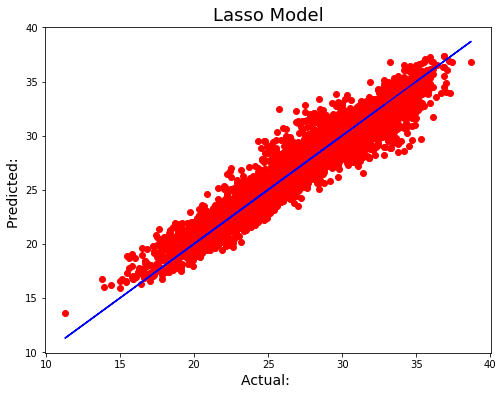

In [181]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_ls, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Lasso Model', fontsize = 18)
plt.show()

##### Running the model without outliers

In [182]:
x_wo_train, x_wo_test, y_wo_train, y_wo_test = train_test_split(x_wo, y_wo, test_size = 0.3, random_state = 77)

In [183]:
x_wo_train.shape

(4827, 25)

In [184]:
x_wo_test.shape

(2070, 25)

In [185]:
y_wo_train.shape

(4827, 2)

In [186]:
y_wo_test.shape

(2070, 2)

In [187]:
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_wo_train, y_wo_train)
    a = m.score(x_wo_train, y_wo_train)
    pred_wo_test = m.predict(x_wo_test)
    pred_wo_train = m.predict(x_wo_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_wo_test,pred_wo_test))
    print('Mean squared error: ', mean_squared_error(y_wo_test,pred_wo_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_wo_test,pred_wo_test)))
    print('R2 Score: ', r2_score(y_wo_test,pred_wo_test))
    print('\n\n')

LinearRegression()
Score:  0.7910792045136326
Mean absolute error:  0.9400993868413628
Mean squared error:  1.5470509740449851
Root mean squared error:  1.2438050385992916
R2 Score:  0.7874499621393332



KNeighborsRegressor()
Score:  0.9083566134037866
Mean absolute error:  0.7471014492753616
Mean squared error:  0.9706531323671492
Root mean squared error:  0.9852173021050479
R2 Score:  0.8614342125664523



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  0.9874637681159406
Mean squared error:  1.8310310144927544
Root mean squared error:  1.353155946109965
R2 Score:  0.7422032006733513



RandomForestRegressor()
Score:  0.9838226259391257
Mean absolute error:  0.6820657971014488
Mean squared error:  0.8237812306666665
Root mean squared error:  0.9076239478256766
R2 Score:  0.8846427359837703



Lasso(alpha=0.0031257158496882415)
Score:  0.7910078334094877
Mean absolute error:  0.9397778186777135
Mean squared error:  1.546119881316712
Root mean squared error:  1.2434306901941

    #Cross validation

In [188]:
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model: 
    print (m)
    i=[]
    for j in range (2,10):
        score_wo = cross_val_score(m, x_wo, y_wo, cv = j)
        cv_wo_mean = score_wo.mean()
        i.append(cv_wo_mean)
        a = i.index(max(i))+2
        b = max(i)
    print(f'At cross fold {a} the cv score is {b}')
    print('\n')

LinearRegression()
At cross fold 3 the cv score is 0.7382567010276085


KNeighborsRegressor()
At cross fold 4 the cv score is 0.5418567320081704


DecisionTreeRegressor()
At cross fold 2 the cv score is 0.4483852571598562


RandomForestRegressor()
At cross fold 4 the cv score is 0.7021166344716429


Lasso(alpha=0.0031257158496882415)
At cross fold 3 the cv score is 0.7393951833002376


Ridge()
At cross fold 3 the cv score is 0.7382733659668345


ElasticNet()
At cross fold 4 the cv score is 0.5798859619452634




    Once again, we can see that the best model is Lasso. 

### Rerunning the best model without outliers

In [189]:
ls_wo = Lasso()

In [190]:
ls_wo.fit(x_wo_train, y_wo_train)
a = ls_wo.score(x_wo_train, y_wo_train)
pred_test_ls_wo = ls_wo.predict(x_wo_test)
pred_train_ls_wo = ls_wo.predict(x_wo_train)
print('Score: ', a)
print('Mean absolute error: ', mean_absolute_error(y_wo_test,pred_test_ls_wo))
print('Mean squared error: ', mean_squared_error(y_wo_test,pred_test_ls_wo))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_wo_test,pred_test_ls_wo)))
print('R2 Score: ', r2_score(y_wo_test,pred_test_ls_wo))

Score:  0.5695283858447224
Mean absolute error:  1.3883287842882
Mean squared error:  3.090990877263069
Root mean squared error:  1.7581214057234698
R2 Score:  0.5673258037243128


### GridSearchCV without Outliers

In [191]:
parameters = {'alpha': (np.logspace(-8, 8, 100))}
ls_wo = Lasso()
clf_wo = GridSearchCV(ls_wo, parameters, cv = 4, n_jobs = -1, verbose = 2)
clf_wo.fit(x_wo_train, y_wo_train)

print(clf_wo.best_params_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
{'alpha': 0.002154434690031887}


In [192]:
ls_wo = Lasso(alpha = 0.002154434690031887)
ls_wo.fit(x_wo_train, y_wo_train)
ls_wo.score(x_wo_train, y_wo_train)
pred_ls_wo = ls_wo.predict(x_wo_test)

lss_wo = r2_score(y_wo_test, pred_ls_wo)
lss_wo

0.7875326453552395

    We're getting a model with 78% accuracy

### Plotting the model fit without outliers

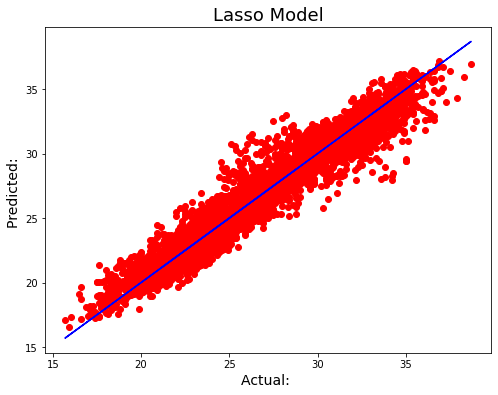

In [193]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_wo_test, y = pred_ls_wo, color = 'r')
plt.plot(y_wo_test, y_wo_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Lasso Model', fontsize = 18)
plt.show()

    Since both the models are good fits, we'll create an object file for both of them.

### Saving the model 

In [194]:
import joblib
joblib.dump(ls, 'Temperature_Forecast.obj')

['Temperature_Forecast.obj']

In [195]:
joblib.dump(ls_wo, 'Temperature_Forecast_wo_Outliers.obj')

['Temperature_Forecast_wo_Outliers.obj']

### Re-importing the model

In [196]:
final = joblib.load('Temperature_Forecast.obj')
final.predict(x_train)

array([[33.72247629, 25.63846232],
       [31.47128493, 23.07548627],
       [29.6748838 , 25.68171863],
       ...,
       [30.8808389 , 24.31102313],
       [29.70977179, 22.70348876],
       [32.33589745, 23.87067087]])

In [197]:
final_wo = joblib.load('Temperature_Forecast_wo_Outliers.obj')
final_wo.predict(x_wo_train)

array([[24.79749138, 19.95500873],
       [32.74921817, 26.0985841 ],
       [29.56991725, 21.73386237],
       ...,
       [31.41500047, 23.23414605],
       [31.50262906, 24.38300413],
       [25.36668992, 17.64127096]])